# 1. Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# 2. Load data
- X와 y분리
- training / test data 분리

In [2]:
dataset = pd.read_csv('Iris_ohe.csv').values

In [3]:
dataset[-5:]

array([[146. ,   6.7,   3. ,   5.2,   2.3,   0. ,   0. ,   1. ],
       [147. ,   6.3,   2.5,   5. ,   1.9,   0. ,   0. ,   1. ],
       [148. ,   6.5,   3. ,   5.2,   2. ,   0. ,   0. ,   1. ],
       [149. ,   6.2,   3.4,   5.4,   2.3,   0. ,   0. ,   1. ],
       [150. ,   5.9,   3. ,   5.1,   1.8,   0. ,   0. ,   1. ]])

In [4]:
# X: column index 1부터 index 4까지 (SepalLength, SepalWidth, PetalLength, PetalWidth)
# y: column index 5부터 index 7(마지막 index)까지 (Setosa, Versicolor, Virginica)
X = dataset[:,1:5]
y = dataset[:,5:]
# print(X)
# print(y)
print(X.shape, y.shape)

(150, 4) (150, 3)


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=15)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120, 3) (30, 3)


# 3. Artificial Neural Netwokrs(ANN) structure
- Multi-layer perceptron (MLP)

1) input layer의 node는 몇 개인가? 4개 = X column의 수 = 특징의 수(sepalWidth,sepalLength,petalWidth,petalLength)<br>
2) output layer의 node는 몇 개인가? 3개 = y column의 수 = class의 수(setosa,versicolor,virginica)<br>
3) 몇 개의 hidden layer로 구성할 것인가? 1개(임의로 지정)<br>
4) 각 hidden layer node의 수는 몇 개인가? 5개(임의로 지정)<br>
5) 어떠한 activation function을 사용할 것인가?

In [6]:
# X_train에 포함된 하나의 sample에 대한 shape
sample_shape = X_train[0].shape  # (4,)
num_class = y_train.shape[1]     # 3
# y_train 또는 y_test의 shape은 각각 (데이터 sample의 수, class의 수)
# 그러므로 y_train.shape[0] = training data의 수, y_train.shape[1] = class의 수

In [7]:
# Sequential(ANN의 layer를 정의)
iris_model = Sequential([
    # 1. input layer → hidden layer
    Dense(5,activation='relu',input_shape=sample_shape),
    # → Dense(5,activation='relu',input_shape=(4,)),
    # Dense(hidden layer node의 수, activation function, input_shape(입력 데이터의 shape))
    # * activation = 'sigmoid' or 'relu' or 'tanh' or 'softmax' or 'linear'
    #   일반적으로 relu를 가장 많이 사용함
    #   softmax는 분류(classification) 문제에서 output layer에 적용됨
    # * input_shape은 X_train의 shape을 의미하지 않으며, X_train에 포함된 하나의 sample에 대한 shape을 의미한다.
    #   ex> X_train.shape = (120,4)일 때, X_train 중 하나의 data에 대한 shape을 의미하므로 input_shape = (4,)가 된다.
    #       X_train.shape에서 120은 sample의 수를 의미하며, neural networks를 설계할 sample의 수는 영향을 미치지 않는다.
    #       table 형태로 저장된 csv 파일 형태인 경우, 대부분의 경우 input_shape은 1 darray이다.
    #       위의 예에서는 input_shape = X_train[0].shape = (4,)

    # 2. hidden layer → output layer
    Dense(num_class,activation='softmax')
    # → Dense(3,activation='softmax')
    # 첫번째 layer를 제외한 나머지 추가 layer는 이전 layer로부터 입력 shape을 가져오므로, 지정할 필요 없음
    # 위의 경우, 이전 hidden layer의 node를 5개로 지정했으므로, input shape에 대한 정보를 따로 지정하지 않는다.
])

In [8]:
iris_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 25        
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
Total params: 43 (172.00 Byte)
Trainable params: 43 (172.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 4. ANN 학습

In [9]:
iris_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
# compile(optimizer, loss, metrics)
# * optimizer: cost(loss) function의 최소값을 찾는 방법 (RMSProp, adam, adaDelta 등)
#              default는 RMSProp이며, adam을 가장 많이 사용함
# * loss: cost(loss) function
#         classification 문제에서 학습에 사용되는 y가 One-hot-encoding 된 경우, 일반적으로 categorical_crossentropy를 사용
#         y가 One-hot-encoding이 아닌 값이 정수인 1열의 data일 경우, sparse_categorical_crossentropy를 사용
#         y가 2개의 class로 구성된 경우, binary_crossentropy를 사용
# * metrics: 학습과정에서 확인하는 성능 평가 척도

In [10]:
# fit(X,y,epochs,batch_size,validation_split)
# 1. X,y: 학습데이터
# 2. epochs: 학습과정에서 학습데이터 전체를 1회 반영 = 1 epoch
# 3. batch_size: 학습 과정에서 그룹핑할 데이터의 수 (1~sample의 수)
#                1 - 개별 데이터에 대한 loss에 대해 update 함 (1 epoch에 데이터의 수만큼 w와 b가 업데이트 됨) Stochastic grandient descent
#                sample의 수 - 모든 데이터에 대한 loss에 대해 update 함 (1 epoch에 1회 w와 b가 업데이트 됨) Batch gradient descent
#                1과 sample의 수 사이의 값 - mini Batch gradient descent
# 4. validation_split: 입력된 학습 데이터 중 일부를 결과 검증에 사용함 (0~1 사이의 값)

ep = 500
batch = 32
val_ratio = 0.2

learning_result = iris_model.fit(X_train, y_train,
                                 epochs = ep,
                                 batch_size = batch,
                                 validation_split = val_ratio)

Epoch 1/500
3/3 [==============================] - 2s 342ms/step - loss: 3.9270 - acc: 0.3333 - val_loss: 4.6090 - val_acc: 0.2083
Epoch 2/500
3/3 [==============================] - 0s 61ms/step - loss: 3.8141 - acc: 0.3333 - val_loss: 4.4793 - val_acc: 0.2083
Epoch 3/500
3/3 [==============================] - 0s 54ms/step - loss: 3.7121 - acc: 0.3333 - val_loss: 4.3491 - val_acc: 0.2083
Epoch 4/500
3/3 [==============================] - 0s 83ms/step - loss: 3.5989 - acc: 0.3333 - val_loss: 4.2218 - val_acc: 0.2083
Epoch 5/500
3/3 [==============================] - 0s 101ms/step - loss: 3.4957 - acc: 0.3333 - val_loss: 4.0950 - val_acc: 0.2083
Epoch 6/500
3/3 [==============================] - 0s 103ms/step - loss: 3.3943 - acc: 0.3333 - val_loss: 3.9694 - val_acc: 0.2083
Epoch 7/500
3/3 [==============================] - 0s 103ms/step - loss: 3.2919 - acc: 0.3333 - val_loss: 3.8454 - val_acc: 0.2083
Epoch 8/500
3/3 [==============================] - 0s 115ms/step - loss: 3.1890 - acc:

# 5. 성능 시각화

Text(0, 0.5, 'accuracy')

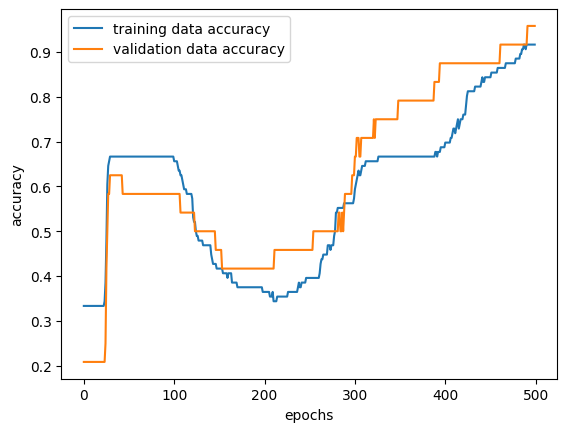

In [11]:
plt.plot(learning_result.history['acc'])
plt.plot(learning_result.history['val_acc'])
plt.legend(['training data accuracy','validation data accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

Text(0, 0.5, 'loss')

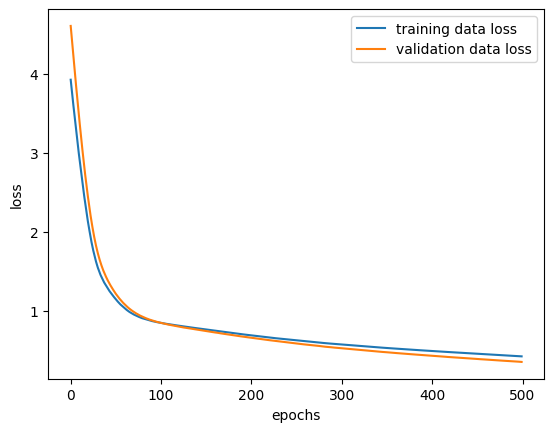

In [12]:
plt.plot(learning_result.history['loss'])
plt.plot(learning_result.history['val_loss'])
plt.legend(['training data loss','validation data loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

# 6. test data 성능 평가

In [13]:
test_loss, test_acc = iris_model.evaluate(X_test,y_test)
print('Test Loss: ', test_loss)
print('Test Accuracy: ', test_acc)

1/1 [==============================] - 0s 23ms/step - loss: 0.4604 - acc: 0.8667
Test Loss:  0.4604291319847107
Test Accuracy:  0.8666666746139526
